<a href="https://colab.research.google.com/github/kalinkabel/Vis-o_Computacional/blob/main/Segmentacao_Clusters_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np

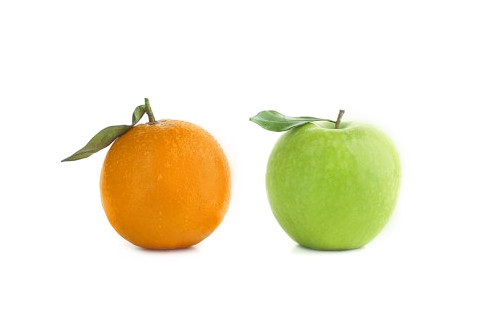

(334, 500, 3)

In [88]:
img = cv.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/frutas.jpg', cv.IMREAD_COLOR)
cv2_imshow(img)
img.shape

In [89]:
vetorizado = img.reshape((-1, 3))
vetorizado.shape

(167000, 3)

In [90]:
#Convertendo os valores de inteiro para float 
vetorizado =np.float32(vetorizado)

In [91]:
#criterio de parada
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [92]:
#/criando a função Kmeans
ret ,label, centros = cv.kmeans(vetorizado,3,None, criterio,10, cv.KMEANS_RANDOM_CENTERS)

In [93]:
print(ret)

66690527.283522815


In [94]:
print(label), len(label), np.unique(label)

[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]


(None, 167000, array([0, 1, 2], dtype=int32))

In [95]:
centros = np.uint8(centros)
centros

array([[ 14, 133, 225],
       [ 84, 190, 166],
       [254, 255, 255]], dtype=uint8)

In [96]:
#Aplicando filtro na imagem final
img_final = centros[label.flatten()]

In [97]:
img_final= img_final.reshape(img.shape)
img_final.shape

(334, 500, 3)

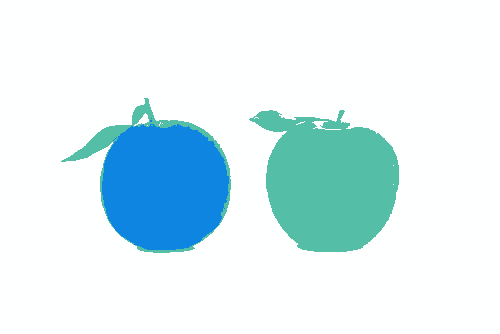

In [98]:
img_final = cv.cvtColor(img_final, cv.COLOR_BGR2RGB)
cv2_imshow(img_final)

In [99]:
def segmentacao_cluster(img,k):
 vetorizado = np.float32(img).reshape(-1,3)
 criterio =  (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)
 ret, label, centros = cv.kmeans(vetorizado, k, None, criterio, 10, cv.KMEANS_RANDOM_CENTERS)
 centros = np.uint8(centros)
 img_final = centros[label.flatten()]
 img_final = img_final.reshape(img.shape)
 return img_final

In [100]:
def segmentacao_clustering(img):
  titulos = ['Imagem original']
  imagens = [img]

  segmentacoes = 6
  for k in range(2, segmentacoes + 1):
    titulo = 'k = ' + str(k)
    titulos.append(titulo)
    seg = segmentacao_cluster(img, k)
    imagens.append(seg)

  fig = plt.gcf()
  fig.set_size_inches(18, 12)  
  for i in range(6):
      plt.subplot(2,3,i+1)
      plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB))
      plt.title(titulos[i]) 
      plt.xticks([]),plt.yticks([]) 
      
  plt.subplots_adjust(wspace=0.05)
  plt.show()



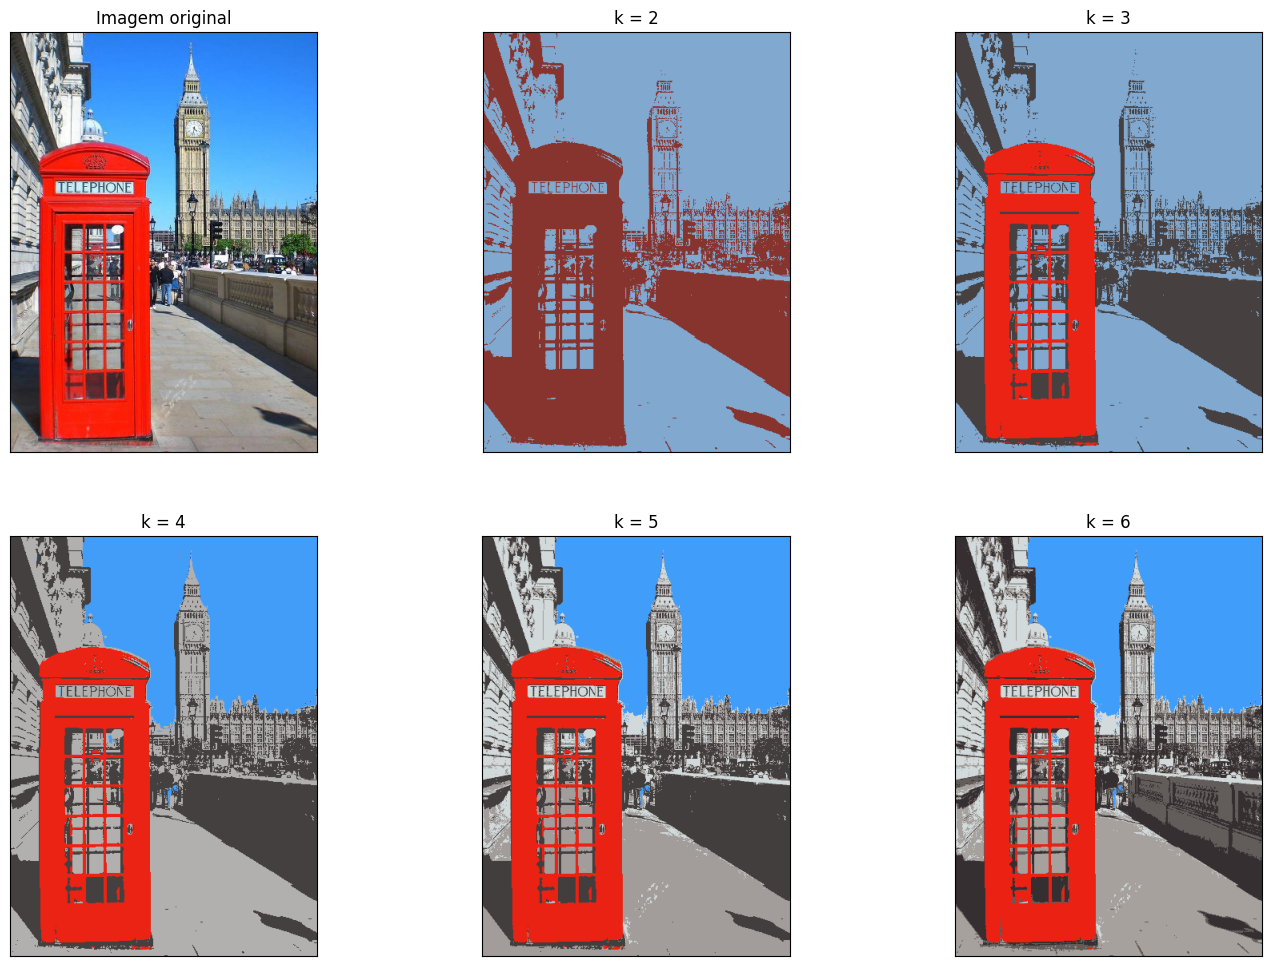

In [104]:
segmentacao_clustering(img)

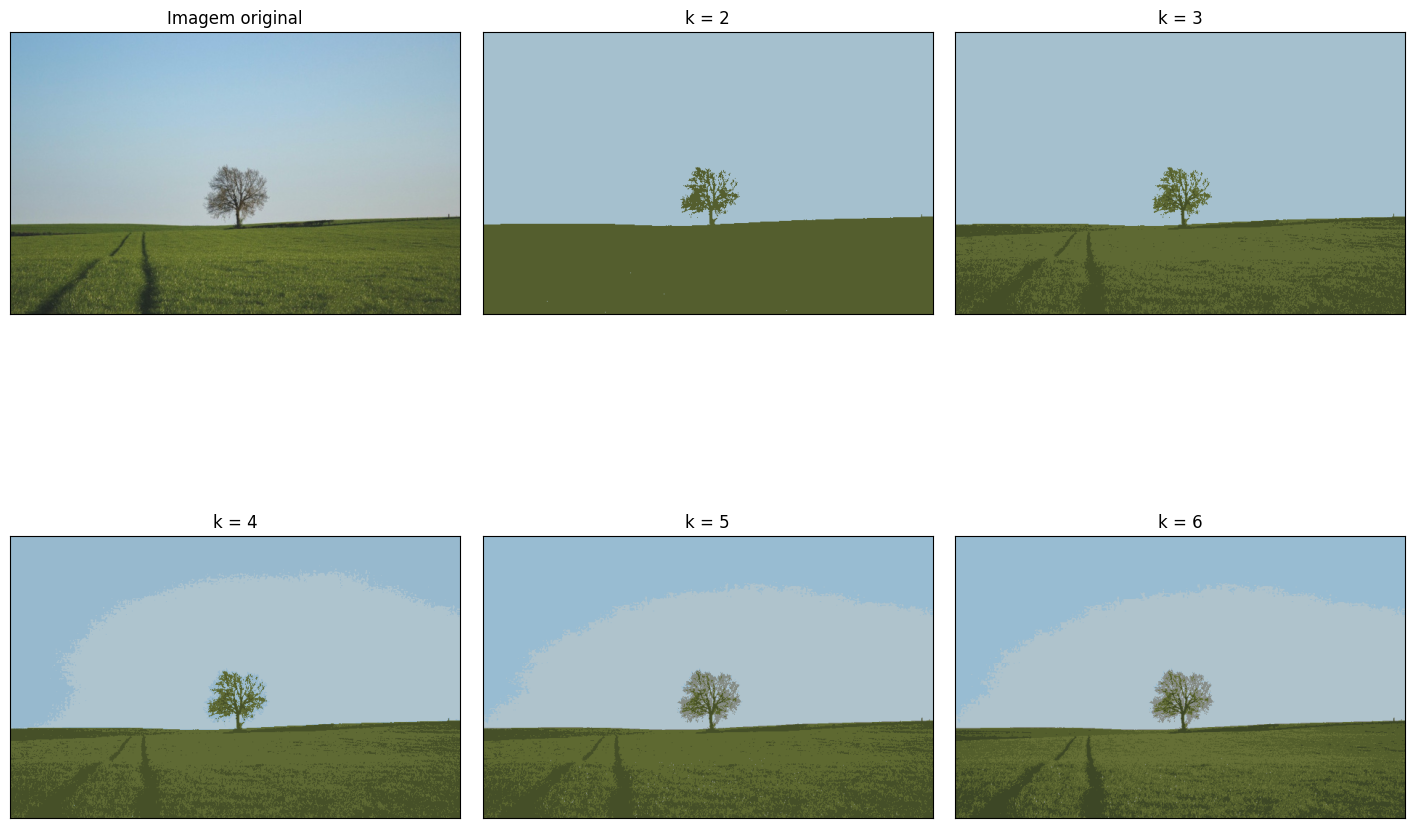

In [102]:
img = cv.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/paisagem01.jpg')
segmentacao_clustering(img)

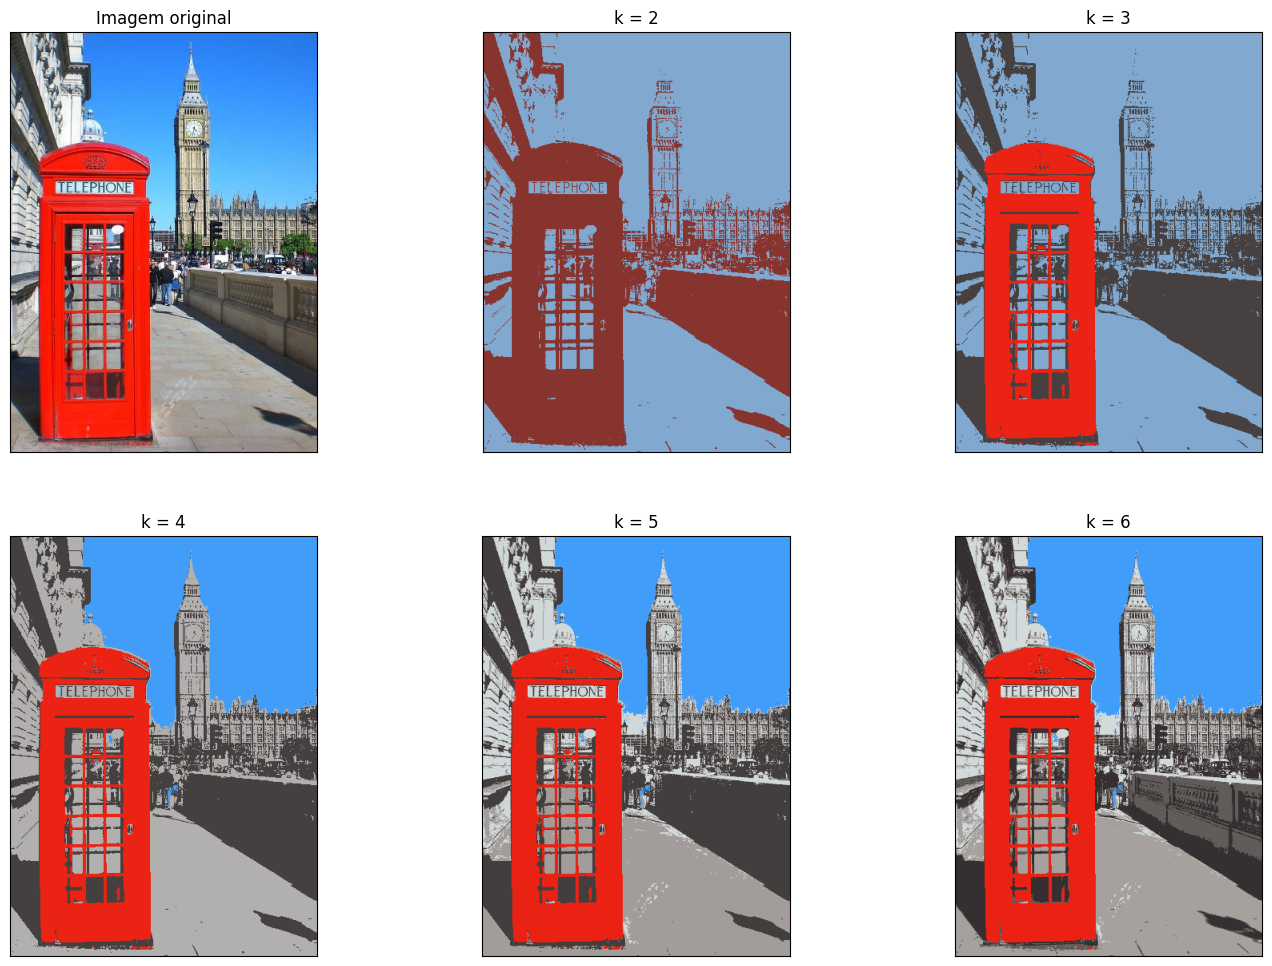

In [103]:
img = cv.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/london-red-phonebox.jpg')
segmentacao_clustering(img)